# Modelos estadísticos: statsmodel

Statsmodels es una librería para Python especializada en la exploración, estimación y evaluación de modelos, ajuste de parámetros y realización de tests estadísticos sobre conjuntos de datos y distribuciones. 

Statsmodels está construido sobre la base de NumPy, y se integra con las estructuras de datos de Pandas. Además, incluye la posibilidad de definir modelos siguiendo la sintaxis de fórmulas de R, lo que facilita la transición para los usuarios de este lenguaje.

### Modelos lineales

Vamos a repasar algunos modelos que viste en la Unidad 7 de regresión lineal, mostrándote ejemplos de cómo hacerlo en Python. con Statsmodels

#### Modelo lineal simple

Comenzemos con el modelo más simple, que asume que la variable respuesta depende linealmente de una variable explicativa.

$$ Y = \beta_0 + \beta_1 X + \epsilon $$

Reutilizaremos el conjunto de datos de gasto en publicidad en TV, radio y prensa, y ventas conseguidas de producto que empleamos en la Unidad 7.


In [ ]:
# Cargamos las librerias NumPy y Pandas
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
# Cargamos Matplotlib y Seaborn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos los datos de gasto en publicidad
ads = pd.read_csv("../../Datasets/advertising.csv", sep = ";")


Revisamos gráficamente la estructura de los datos.

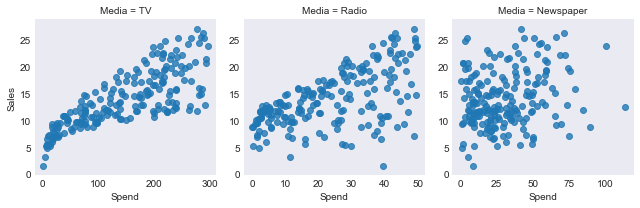

In [ ]:
# Nos preparamos los datos de forma que sea más fácil pintarlos
ads_m = ads.melt(id_vars='Sales', value_vars=['TV','Radio','Newspaper'], var_name='Media', value_name='Spend')

# Representamos en una rejilla las ventas según gasto en cada medio
sns.FacetGrid(ads_m, col='Media', sharex=False).map(sns.regplot, 'Spend', 'Sales', fit_reg=False)

Para este primer ejemplo, intentamos explicar las ventas a partir del gasto en publicidad en TV.

Vamos a definir el modelo y realizar el ajuste de coeficientes por mínimos cuadrados con Statsmodels.

In [ ]:
import statsmodels.api as sm

# Definimos un modelo y ~ b0 + b1*X + e

# Vector respuesta
y = ads['Sales']
# Matriz de variables explicativas del modelo
X = ads['TV']
# Añadimos un término constante a la matriz del modelo (b0)
X = sm.add_constant(X, prepend=False)

# Construimos el objeto modelo
# usamos un modelo lineal tipo OLS
# (Ordinary Least Squares)
model = sm.OLS(y, X)

# Ajustamos los parámetros del modelo (b0, b1)
mfitted = model.fit()

# Veamos el resumen del modelo ajustado
print(mfitted.summary())


C:\Users\rubmor\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           1.47e-42
Time:                        19:10:25   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0475      0.003     17.668      0.0

El código no es nada complejo. No obstante, repasemos los pasos, ya que la mecánica es común para cualquier tipo de modelo que queramos utilizar.

En primer lugar tenemos que definir el modelo. En Statsmodels la forma básica de definir un modelo es construyendo el vector respuesta y la matriz de variables explicativas o matriz de regresión. 

La variable respuesta (o endógena en terminología de Statsmodels) la pasaremos como un array o serie de _N_ observaciones. En este ejemplo, construimos el vector respuesta `y` a partir de los datos de ventas.

Las variables explicativas (o exógenas) las pasamos como un array o matriz _(N x k)_, donde _N_ es el número de observaciones (filas) y _k_ es el número de variables explicativas independientes que forman el modelo. A esta matriz se la conoce como matriz del modelo o matriz de diseño. En este ejemplo, construimos la matriz exógena `X` a partir del gasto en TV.

Esta forma de definir un modelo mediante su matriz requiere que añadamos explícitamente un término constante para ajustar el coeficiente $\beta_0$, correspondiente a la ordenada en el origen o _intercept_. Podemos hacer esto facilmente con `sm.add_constant()`.

Una vez que tenemos la matriz del modelo y el vector respuesta, podemos crear el modelo. En este caso utilizamos `sm.OLS`. Esta clase implementa una regresión lineal por mínimos cuadrados, la técnica más común.

Después de crear modelo, estimamos los coeficientes que mejor se ajustan a la muestra de datos mediante el método `fit()` del modelo.

Con el modelo ajustado, podemos examinar algunos indicadores y parámetros del ajuste con `summary()`.

Statsmodels también incluye una API (`statsmodels.api.graphics`) con varias funciones para generar distintos gráficos muy útiles para analizar y validar nuestros modelos, como gráficos de correlación, de bondad del ajuste o de análisis de regresores.

Vamos a pintar un gráfico con los valores estimados por nuestro modelo frente a los valores observados.

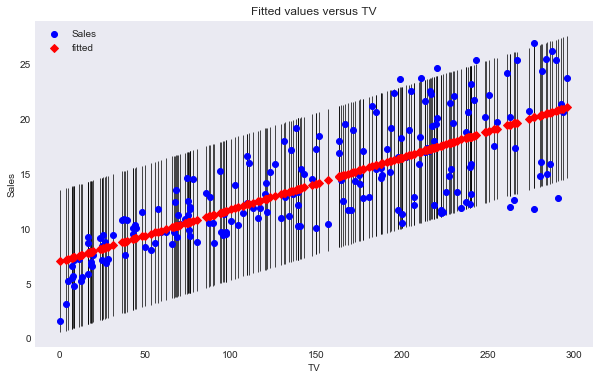

In [ ]:
fig = plt.figure()
fig = sm.graphics.plot_fit(mfitted, "TV").set_size_inches(10, 6)

Finalmente, con nuestro modelo ajustado ya podemos hacer estimaciones para nuevos datos de entrada, empleando el método `predict()`.

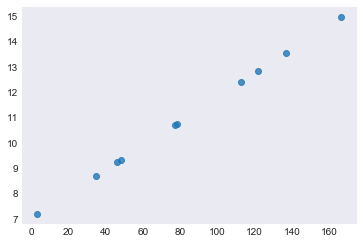

In [ ]:
# Generamos unos cuantos valores aleatorios
# para el gasto en TV
nuevas_obs = np.random.uniform(low=0, high=200, size=10)
# Añadimos la constante
nuevas_obs = sm.add_constant(nuevas_obs, prepend=False)

# Predecir la respuesta
y_pred = mfitted.predict(nuevas_obs)

# Nos pintamos las variables de gasto (X)
# y ventas estimadas (y_pred)
sns.regplot(x=nuevas_obs[:,0], y=y_pred, fit_reg=False)